In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from keras.models import Model,Sequential
from keras.layers import Dense,Input
from keras.optimizers import Adam
from keras.utils import np_utils

In [2]:
data=pd.read_csv('fashion-mnist_test.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x=data.values


In [4]:
X=x[:,1:]
y=x[:,0]
X=X/255
print(X.shape)
print(y.shape)
y=np_utils.to_categorical(y)
print(X.shape,y.shape)

(10000, 784)
(10000,)
(10000, 784) (10000, 10)


In [5]:

X_train=X[:8000,:]
y_train=y[:8000,:]

X_val=X[8000:,:]
y_val=y[8000:,:]
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(8000, 784) (8000, 10)
(2000, 784) (2000, 10)


In [6]:
#Sequential Model

model=Sequential()
model.add(Dense(256,activation='tanh',input_shape=(784,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [7]:
adam=Adam(decay=0.0001)

In [8]:
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [9]:
history=model.fit(X_train,y_train,epochs=10,batch_size=500,shuffle=True,validation_data=(X_val,y_val))

Epoch 1/10
16/16 [==============================] - 2s 104ms/step - loss: 1.3049 - accuracy: 0.5636 - val_loss: 0.7822 - val_accuracy: 0.7250
Epoch 2/10
16/16 [==============================] - 1s 62ms/step - loss: 0.6824 - accuracy: 0.7682 - val_loss: 0.6195 - val_accuracy: 0.7845
Epoch 3/10
16/16 [==============================] - 1s 52ms/step - loss: 0.5727 - accuracy: 0.7980 - val_loss: 0.5292 - val_accuracy: 0.8080
Epoch 4/10
16/16 [==============================] - 1s 64ms/step - loss: 0.5126 - accuracy: 0.8175 - val_loss: 0.4876 - val_accuracy: 0.8190
Epoch 5/10
16/16 [==============================] - 1s 53ms/step - loss: 0.4699 - accuracy: 0.8363 - val_loss: 0.4553 - val_accuracy: 0.8295
Epoch 6/10
16/16 [==============================] - 1s 49ms/step - loss: 0.4438 - accuracy: 0.8444 - val_loss: 0.4510 - val_accuracy: 0.8425
Epoch 7/10
16/16 [==============================] - 1s 48ms/step - loss: 0.4241 - accuracy: 0.8487 - val_loss: 0.4546 - val_accuracy: 0.8385
Epoch 8/10
1

In [10]:
model.save("mymodel1.h5") 

In [11]:
model.load_weights("mymodel1.h5")

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [13]:
loss,acc=model.evaluate(X_train,y_train)
print("Restored model,acc: {:5.2f}%".format(100*acc))
print("Restored model,loss: {:5.2f}%".format(100*loss))

250/250 [==============================] - 2s 6ms/step - loss: 0.3653 - accuracy: 0.8737
Restored model,acc: 87.37%
Restored model,loss: 36.53%


KeyError: 'acc'

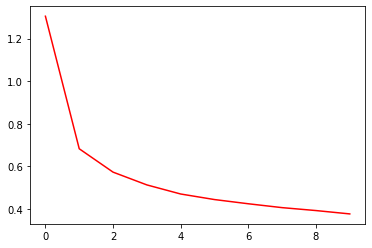

In [14]:
#Adam with decay(learning rate)

plt.plot(history.history['loss'],color='red',label='line1') ## training loss
 
plt.plot(history.history['acc'],color='blue',label='line2')  ## training accuracy
plt.plot(history.history['val_acc'],color='green',label='line3') #validation accuracy
plt.plot(history.history['val_loss'],color='yellow',label='line4') #validation loss
plt.show()